<a href="https://colab.research.google.com/github/anshulbhute/Machine-Learning-Lab/blob/main/Bonus7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Random Forest Results:
Accuracy: 0.8462
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.84      0.84      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix:
[[41  7]
 [ 7 36]]

Feature Importance:
age: 0.0881
sex: 0.0484
cp: 0.1268
trestbps: 0.0796
chol: 0.0773
fbs: 0.0081
restecg: 0.0184
thalach: 0.1272
exang: 0.0721
oldpeak: 0.0905
slope: 0.0442
ca: 0.1245
thal: 0.0947

Tuned Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8462
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.85      0.81      0.83        43

    accuracy                  

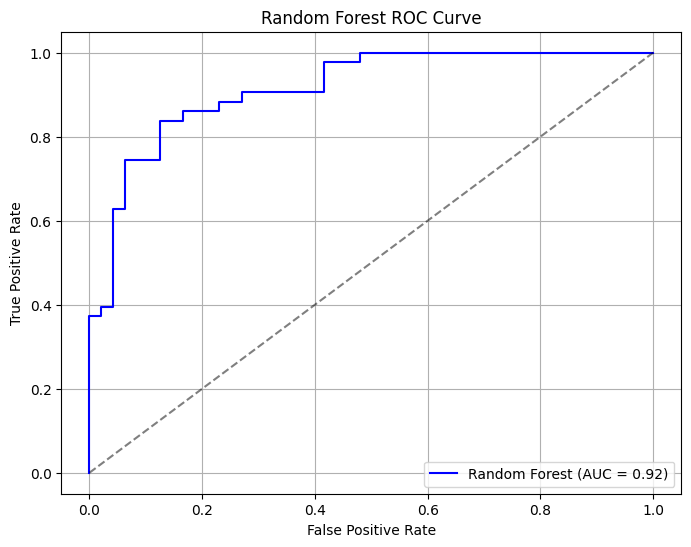

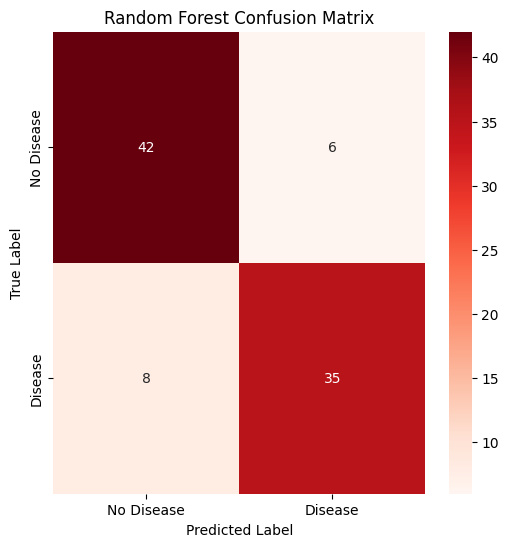

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load Heart Disease UCI dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
         'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=names, na_values='?')

# Handle missing values (simple imputation)
heart_data.fillna(heart_data.median(numeric_only=True), inplace=True)

# Convert target to binary (0 = no disease, 1-4 = disease)
heart_data['target'] = heart_data['target'].apply(lambda x: 1 if x > 0 else 0)

# Split into features and target
X_heart = heart_data.drop('target', axis=1)
y_heart = heart_data['target']

# Split into train and test sets
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42)

# Standardize features
scaler_heart = StandardScaler()
X_train_heart = scaler_heart.fit_transform(X_train_heart)
X_test_heart = scaler_heart.transform(X_test_heart)

### Random Forest Implementation ###
# Basic Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_heart, y_train_heart)
y_pred_rf = rf_clf.predict(X_test_heart)

print("Basic Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test_heart, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test_heart, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_heart, y_pred_rf))

# Feature Importance
print("\nFeature Importance:")
for name, importance in zip(X_heart.columns, rf_clf.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0  # Reduced verbosity
)

grid_search.fit(X_train_heart, y_train_heart)

# Best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_heart)

print("\nTuned Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test_heart, y_pred_best_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test_heart, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_heart, y_pred_best_rf))

# 2. ROC Curve for Random Forest
plt.figure(figsize=(8, 6))
y_proba_rf = best_rf.predict_proba(X_test_heart)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_heart, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 3. Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test_heart, y_pred_best_rf),
            annot=True, fmt='d', cmap='Reds',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
